In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [11]:
#for splitting the folders
!pip install split-folders

import splitfolders
splitfolders.ratio('images', output="output", seed=1337, ratio=(.8, 0.2)) 

Copying files: 8774 files [02:00, 72.53 files/s]


In [2]:
import os
base_dir = r'C:\Users\viren\StarAgile\Assignments\Assignment-19\Best Artworks Of All The Time\output'
os.listdir(base_dir)

['train', 'val']

In [3]:
train_dir = os.path.join(base_dir, 'train')
val_dir   = os.path.join(base_dir, 'val')

print(os.listdir(train_dir))
print(os.listdir(val_dir))

['Albrecht_DuΓòá├¬rer', 'Albrecht_Du╠êrer', 'Alfred_Sisley', 'Amedeo_Modigliani', 'Andrei_Rublev', 'Andy_Warhol', 'Camille_Pissarro', 'Caravaggio', 'Claude_Monet', 'Diego_Rivera', 'Diego_Velazquez', 'Edgar_Degas', 'Edouard_Manet', 'Edvard_Munch', 'El_Greco', 'Eugene_Delacroix', 'Francisco_Goya', 'Frida_Kahlo', 'Georges_Seurat', 'Giotto_di_Bondone', 'Gustave_Courbet', 'Gustav_Klimt', 'Henri_de_Toulouse-Lautrec', 'Henri_Matisse', 'Henri_Rousseau', 'Hieronymus_Bosch', 'Jackson_Pollock', 'Jan_van_Eyck', 'Joan_Miro', 'Kazimir_Malevich', 'Leonardo_da_Vinci', 'Marc_Chagall', 'Michelangelo', 'Mikhail_Vrubel', 'Pablo_Picasso', 'Paul_Cezanne', 'Paul_Gauguin', 'Paul_Klee', 'Peter_Paul_Rubens', 'Pierre-Auguste_Renoir', 'Pieter_Bruegel', 'Piet_Mondrian', 'Raphael', 'Rembrandt', 'Rene_Magritte', 'Salvador_Dali', 'Sandro_Botticelli', 'Titian', 'Vasiliy_Kandinskiy', 'Vincent_van_Gogh', 'William_Turner']
['Albrecht_DuΓòá├¬rer', 'Albrecht_Du╠êrer', 'Alfred_Sisley', 'Amedeo_Modigliani', 'Andrei_Rublev', 

In [4]:
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 10,
    zoom_range = 0.2,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (100,100),
    batch_size = 20,
    class_mode = 'categorical'
)

Found 6997 images belonging to 51 classes.


In [5]:
val_datagen = ImageDataGenerator(rescale = 1/255)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size = (100,100),
    batch_size = 20,
    class_mode = 'categorical'
)

Found 1777 images belonging to 51 classes.


In [6]:
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = val_generator.n//val_generator.batch_size
print("Total number of batches =", STEP_SIZE_TRAIN, "and", STEP_SIZE_VALID)

Total number of batches = 349 and 88


In [7]:
from tensorflow.keras import callbacks
from keras.callbacks import ReduceLROnPlateau
lr_reduction = ReduceLROnPlateau(monitor = 'accuracy',
                                 patience = 3,
                                 factor = 0.5,
                                 verbose = 1)

## Model 1

In [37]:
model = tf.keras.models.Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100,100,3), padding = 'same'))
model.add(Conv2D(32, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(128, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(51, activation = 'softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 15, 15, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                  

In [38]:
model.compile(optimizer = Adam(),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [41]:
# history = model.fit(
#     train_generator,
#     validation_data = val_generator,
#     epochs = 100,
#     verbose = 1
# )

history = model.fit(
    train_generator,
    validation_data = val_generator,
    epochs = 100,
    verbose = 1,
    callbacks = [CALLBACKS] 
)

Epoch 1/100
140/140 [==============================] - 39s 277ms/step - loss: 2.6941 - accuracy: 0.2557 - val_loss: 3.2411 - val_accuracy: 0.1632 - lr: 0.0010
Epoch 2/100
140/140 [==============================] - 39s 277ms/step - loss: 2.6772 - accuracy: 0.2541 - val_loss: 2.9969 - val_accuracy: 0.2032 - lr: 0.0010
Epoch 3/100
140/140 [==============================] - 39s 278ms/step - loss: 2.6284 - accuracy: 0.2671 - val_loss: 3.1860 - val_accuracy: 0.1829 - lr: 0.0010
Epoch 4/100
140/140 [==============================] - 39s 281ms/step - loss: 2.6245 - accuracy: 0.2698 - val_loss: 2.8860 - val_accuracy: 0.2195 - lr: 0.0010
Epoch 5/100
140/140 [==============================] - 39s 278ms/step - loss: 2.5831 - accuracy: 0.2747 - val_loss: 2.9559 - val_accuracy: 0.2251 - lr: 0.0010
Epoch 6/100
140/140 [==============================] - 39s 277ms/step - loss: 2.5724 - accuracy: 0.2768 - val_loss: 3.0894 - val_accuracy: 0.1908 - lr: 0.0010
Epoch 7/100
140/140 [=========================

140/140 [==============================] - 41s 292ms/step - loss: 1.5609 - accuracy: 0.5048 - val_loss: 3.5698 - val_accuracy: 0.2375 - lr: 5.0000e-04
Epoch 52/100
140/140 [==============================] - 41s 295ms/step - loss: 1.5516 - accuracy: 0.5089 - val_loss: 3.5877 - val_accuracy: 0.2482 - lr: 5.0000e-04
Epoch 53/100
140/140 [==============================] - 42s 296ms/step - loss: 1.5227 - accuracy: 0.5128 - val_loss: 3.7985 - val_accuracy: 0.2240 - lr: 5.0000e-04
Epoch 54/100
140/140 [==============================] - 40s 288ms/step - loss: 1.5076 - accuracy: 0.5158 - val_loss: 3.6698 - val_accuracy: 0.2386 - lr: 5.0000e-04
Epoch 55/100
140/140 [==============================] - 41s 292ms/step - loss: 1.4830 - accuracy: 0.5299 - val_loss: 3.6575 - val_accuracy: 0.2532 - lr: 5.0000e-04
Epoch 56/100
140/140 [==============================] - 42s 299ms/step - loss: 1.4721 - accuracy: 0.5252 - val_loss: 4.0480 - val_accuracy: 0.2217 - lr: 5.0000e-04
Epoch 57/100
116/140 [=======


KeyboardInterrupt



## Model 2

In [7]:
from tensorflow.keras import layers
INPUT_SHAPE = (100, 100, 3)

weights = 'imagenet'
dense_units = 1024

inputs = layers.Input(INPUT_SHAPE)

base_model = tf.keras.applications.InceptionResNetV2(
    include_top=False,
    weights=weights,
    input_shape=INPUT_SHAPE,
)
            

x = base_model.output
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(dense_units)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation(activation='relu')(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(51, activation="softmax")(x)


model = keras.Model(inputs=base_model.input, outputs=outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 37, 37, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 37, 37, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 37, 37, 32)   0           ['batch_normalization[0][0]']

 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 7, 7, 64)    192         ['conv2d_11[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_5 (Activation)      (None, 7, 7, 96)     0           ['batch_normalization_5[0][0]']  
                                                                                                  
 activation_7 (Activation)      (None, 7, 7, 64)     0           ['batch_normalization_7[0][0]']  
                                                                                                  
 activation_10 (Activation)     (None, 7, 7, 96)     0           ['batch_normalization_10[0][0]'] 
          

 ormalization)                                                                                    
                                                                                                  
 batch_normalization_22 (BatchN  (None, 7, 7, 48)    144         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_19 (Activation)     (None, 7, 7, 32)     0           ['batch_normalization_19[0][0]'] 
                                                                                                  
 activation_22 (Activation)     (None, 7, 7, 48)     0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_18 (Conv2D)             (None, 7, 7, 32)     10240       ['block35_1_ac[0][0]']           
          

 block35_3_mixed (Concatenate)  (None, 7, 7, 128)    0           ['activation_24[0][0]',          
                                                                  'activation_26[0][0]',          
                                                                  'activation_29[0][0]']          
                                                                                                  
 block35_3_conv (Conv2D)        (None, 7, 7, 320)    41280       ['block35_3_mixed[0][0]']        
                                                                                                  
 block35_3 (Lambda)             (None, 7, 7, 320)    0           ['block35_2_ac[0][0]',           
                                                                  'block35_3_conv[0][0]']         
                                                                                                  
 block35_3_ac (Activation)      (None, 7, 7, 320)    0           ['block35_3[0][0]']              
          

 activation_40 (Activation)     (None, 7, 7, 48)     0           ['batch_normalization_40[0][0]'] 
                                                                                                  
 conv2d_36 (Conv2D)             (None, 7, 7, 32)     10240       ['block35_4_ac[0][0]']           
                                                                                                  
 conv2d_38 (Conv2D)             (None, 7, 7, 32)     9216        ['activation_37[0][0]']          
                                                                                                  
 conv2d_41 (Conv2D)             (None, 7, 7, 64)     27648       ['activation_40[0][0]']          
                                                                                                  
 batch_normalization_36 (BatchN  (None, 7, 7, 32)    96          ['conv2d_36[0][0]']              
 ormalization)                                                                                    
          

                                                                  'block35_6_conv[0][0]']         
                                                                                                  
 block35_6_ac (Activation)      (None, 7, 7, 320)    0           ['block35_6[0][0]']              
                                                                                                  
 conv2d_51 (Conv2D)             (None, 7, 7, 32)     10240       ['block35_6_ac[0][0]']           
                                                                                                  
 batch_normalization_51 (BatchN  (None, 7, 7, 32)    96          ['conv2d_51[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_51 (Activation)     (None, 7, 7, 32)     0           ['batch_normalization_51[0][0]'] 
          

                                                                                                  
 batch_normalization_54 (BatchN  (None, 7, 7, 32)    96          ['conv2d_54[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_56 (BatchN  (None, 7, 7, 32)    96          ['conv2d_56[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_59 (BatchN  (None, 7, 7, 64)    192         ['conv2d_59[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

 ormalization)                                                                                    
                                                                                                  
 activation_69 (Activation)     (None, 7, 7, 32)     0           ['batch_normalization_69[0][0]'] 
                                                                                                  
 conv2d_67 (Conv2D)             (None, 7, 7, 32)     10240       ['block35_9_ac[0][0]']           
                                                                                                  
 conv2d_70 (Conv2D)             (None, 7, 7, 48)     13824       ['activation_69[0][0]']          
                                                                                                  
 batch_normalization_67 (BatchN  (None, 7, 7, 32)    96          ['conv2d_67[0][0]']              
 ormalization)                                                                                    
          

                                                                                                  
 conv2d_77 (Conv2D)             (None, 3, 3, 128)    139264      ['mixed_6a[0][0]']               
                                                                                                  
 batch_normalization_77 (BatchN  (None, 3, 3, 128)   384         ['conv2d_77[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_77 (Activation)     (None, 3, 3, 128)    0           ['batch_normalization_77[0][0]'] 
                                                                                                  
 conv2d_78 (Conv2D)             (None, 3, 3, 160)    143360      ['activation_77[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_86 (Conv2D)             (None, 3, 3, 160)    143360      ['activation_85[0][0]']          
                                                                                                  
 batch_normalization_86 (BatchN  (None, 3, 3, 160)   480         ['conv2d_86[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_86 (Activation)     (None, 3, 3, 160)    0           ['batch_normalization_86[0][0]'] 
                                                                                                  
 conv2d_84 (Conv2D)             (None, 3, 3, 192)    208896      ['block17_2_ac[0][0]']           
                                                                                                  
 conv2d_87

                                                                                                  
 conv2d_92 (Conv2D)             (None, 3, 3, 192)    208896      ['block17_4_ac[0][0]']           
                                                                                                  
 conv2d_95 (Conv2D)             (None, 3, 3, 192)    215040      ['activation_94[0][0]']          
                                                                                                  
 batch_normalization_92 (BatchN  (None, 3, 3, 192)   576         ['conv2d_92[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_95 (BatchN  (None, 3, 3, 192)   576         ['conv2d_95[0][0]']              
 ormalization)                                                                                    
          

                                                                                                  
 batch_normalization_103 (Batch  (None, 3, 3, 192)   576         ['conv2d_103[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_100 (Activation)    (None, 3, 3, 192)    0           ['batch_normalization_100[0][0]']
                                                                                                  
 activation_103 (Activation)    (None, 3, 3, 192)    0           ['batch_normalization_103[0][0]']
                                                                                                  
 block17_7_mixed (Concatenate)  (None, 3, 3, 384)    0           ['activation_100[0][0]',         
                                                                  'activation_103[0][0]']         
          

                                                                                                  
 block17_9_mixed (Concatenate)  (None, 3, 3, 384)    0           ['activation_108[0][0]',         
                                                                  'activation_111[0][0]']         
                                                                                                  
 block17_9_conv (Conv2D)        (None, 3, 3, 1088)   418880      ['block17_9_mixed[0][0]']        
                                                                                                  
 block17_9 (Lambda)             (None, 3, 3, 1088)   0           ['block17_8_ac[0][0]',           
                                                                  'block17_9_conv[0][0]']         
                                                                                                  
 block17_9_ac (Activation)      (None, 3, 3, 1088)   0           ['block17_9[0][0]']              
          

                                                                  'block17_11_conv[0][0]']        
                                                                                                  
 block17_11_ac (Activation)     (None, 3, 3, 1088)   0           ['block17_11[0][0]']             
                                                                                                  
 conv2d_121 (Conv2D)            (None, 3, 3, 128)    139264      ['block17_11_ac[0][0]']          
                                                                                                  
 batch_normalization_121 (Batch  (None, 3, 3, 128)   384         ['conv2d_121[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_121 (Activation)    (None, 3, 3, 128)    0           ['batch_normalization_121[0][0]']
          

 Normalization)                                                                                   
                                                                                                  
 activation_129 (Activation)    (None, 3, 3, 128)    0           ['batch_normalization_129[0][0]']
                                                                                                  
 conv2d_130 (Conv2D)            (None, 3, 3, 160)    143360      ['activation_129[0][0]']         
                                                                                                  
 batch_normalization_130 (Batch  (None, 3, 3, 160)   480         ['conv2d_130[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_130 (Activation)    (None, 3, 3, 160)    0           ['batch_normalization_130[0][0]']
          

 Normalization)                                                                                   
                                                                                                  
 activation_138 (Activation)    (None, 3, 3, 160)    0           ['batch_normalization_138[0][0]']
                                                                                                  
 conv2d_136 (Conv2D)            (None, 3, 3, 192)    208896      ['block17_15_ac[0][0]']          
                                                                                                  
 conv2d_139 (Conv2D)            (None, 3, 3, 192)    215040      ['activation_138[0][0]']         
                                                                                                  
 batch_normalization_136 (Batch  (None, 3, 3, 192)   576         ['conv2d_136[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 batch_normalization_144 (Batch  (None, 3, 3, 192)   576         ['conv2d_144[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_147 (Batch  (None, 3, 3, 192)   576         ['conv2d_147[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_144 (Activation)    (None, 3, 3, 192)    0           ['batch_normalization_144[0][0]']
                                                                                                  
 activation_147 (Activation)    (None, 3, 3, 192)    0           ['batch_normalization_147[0][0]']
          

 activation_152 (Activation)    (None, 3, 3, 192)    0           ['batch_normalization_152[0][0]']
                                                                                                  
 activation_155 (Activation)    (None, 3, 3, 192)    0           ['batch_normalization_155[0][0]']
                                                                                                  
 block17_20_mixed (Concatenate)  (None, 3, 3, 384)   0           ['activation_152[0][0]',         
                                                                  'activation_155[0][0]']         
                                                                                                  
 block17_20_conv (Conv2D)       (None, 3, 3, 1088)   418880      ['block17_20_mixed[0][0]']       
                                                                                                  
 block17_20 (Lambda)            (None, 3, 3, 1088)   0           ['block17_19_ac[0][0]',          
          

                                                                                                  
 conv2d_163 (Conv2D)            (None, 1, 1, 192)    399360      ['mixed_7a[0][0]']               
                                                                                                  
 conv2d_166 (Conv2D)            (None, 1, 1, 256)    172032      ['activation_165[0][0]']         
                                                                                                  
 batch_normalization_163 (Batch  (None, 1, 1, 192)   576         ['conv2d_163[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_166 (Batch  (None, 1, 1, 256)   768         ['conv2d_166[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 batch_normalization_174 (Batch  (None, 1, 1, 256)   768         ['conv2d_174[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_171 (Activation)    (None, 1, 1, 192)    0           ['batch_normalization_171[0][0]']
                                                                                                  
 activation_174 (Activation)    (None, 1, 1, 256)    0           ['batch_normalization_174[0][0]']
                                                                                                  
 block8_3_mixed (Concatenate)   (None, 1, 1, 448)    0           ['activation_171[0][0]',         
                                                                  'activation_174[0][0]']         
          

                                                                                                  
 block8_5_mixed (Concatenate)   (None, 1, 1, 448)    0           ['activation_179[0][0]',         
                                                                  'activation_182[0][0]']         
                                                                                                  
 block8_5_conv (Conv2D)         (None, 1, 1, 2080)   933920      ['block8_5_mixed[0][0]']         
                                                                                                  
 block8_5 (Lambda)              (None, 1, 1, 2080)   0           ['block8_4_ac[0][0]',            
                                                                  'block8_5_conv[0][0]']          
                                                                                                  
 block8_5_ac (Activation)       (None, 1, 1, 2080)   0           ['block8_5[0][0]']               
          

                                                                  'block8_7_conv[0][0]']          
                                                                                                  
 block8_7_ac (Activation)       (None, 1, 1, 2080)   0           ['block8_7[0][0]']               
                                                                                                  
 conv2d_192 (Conv2D)            (None, 1, 1, 192)    399360      ['block8_7_ac[0][0]']            
                                                                                                  
 batch_normalization_192 (Batch  (None, 1, 1, 192)   576         ['conv2d_192[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_192 (Activation)    (None, 1, 1, 192)    0           ['batch_normalization_192[0][0]']
          

 Normalization)                                                                                   
                                                                                                  
 activation_200 (Activation)    (None, 1, 1, 192)    0           ['batch_normalization_200[0][0]']
                                                                                                  
 conv2d_201 (Conv2D)            (None, 1, 1, 224)    129024      ['activation_200[0][0]']         
                                                                                                  
 batch_normalization_201 (Batch  (None, 1, 1, 224)   672         ['conv2d_201[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_201 (Activation)    (None, 1, 1, 224)    0           ['batch_normalization_201[0][0]']
          

In [13]:
from tensorflow.keras import callbacks
from keras.callbacks import ReduceLROnPlateau

EARLY_STOPPING = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    restore_best_weights=True,
    mode='auto')


# REDUCE_LR = callbacks.ReduceLROnPlateau(
#     monitor='val_loss',
#     factor=0.8,
#     patience=1,
#     min_lr=0.000001,
#     verbose=1)

REDUCE_LR = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=1,
    verbose=1,
    mode='auto')

CALLBACKS = [REDUCE_LR, EARLY_STOPPING]
#CALLBACKS = [REDUCE_LR]

In [14]:
model.compile(optimizer = Adam(),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [10]:
print("Trainning Model ...\n")
history = model.fit_generator(
    train_generator,
    steps_per_epoch=STEP_SIZE_TRAIN,
    epochs=100,
    verbose=1,
    callbacks=CALLBACKS,
    validation_data=val_generator,
    validation_steps=STEP_SIZE_VALID
)

Trainning Model ...

Epoch 1/100
349/349 [==============================] - 120s 282ms/step - loss: 3.4973 - accuracy: 0.1835 - val_loss: 36.5566 - val_accuracy: 0.0619 - lr: 0.0010
Epoch 2/100
349/349 [==============================] - 92s 264ms/step - loss: 2.9095 - accuracy: 0.2720 - val_loss: 4.9719 - val_accuracy: 0.2125 - lr: 0.0010
Epoch 3/100
349/349 [==============================] - 92s 264ms/step - loss: 2.6454 - accuracy: 0.3242 - val_loss: 2.8426 - val_accuracy: 0.2784 - lr: 0.0010
Epoch 4/100
349/349 [==============================] - ETA: 0s - loss: 2.4071 - accuracy: 0.3566
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
349/349 [==============================] - 92s 264ms/step - loss: 2.4071 - accuracy: 0.3566 - val_loss: 10.0023 - val_accuracy: 0.3574 - lr: 0.0010
Epoch 5/100
349/349 [==============================] - ETA: 0s - loss: 2.1156 - accuracy: 0.4232
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
349/34

In [15]:
print("Trainning Model ...\n")
history = model.fit_generator(
    train_generator,
    steps_per_epoch=STEP_SIZE_TRAIN,
    epochs=100,
    verbose=1,
    callbacks=CALLBACKS,
    validation_data=val_generator,
    validation_steps=STEP_SIZE_VALID
)

Trainning Model ...

Epoch 1/100
349/349 [==============================] - 109s 272ms/step - loss: 2.4331 - accuracy: 0.3522 - val_loss: 2.3478 - val_accuracy: 0.3580 - lr: 0.0010
Epoch 2/100
349/349 [==============================] - ETA: 0s - loss: 2.6111 - accuracy: 0.3024
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
349/349 [==============================] - 92s 262ms/step - loss: 2.6111 - accuracy: 0.3024 - val_loss: 1446.4934 - val_accuracy: 0.0773 - lr: 0.0010
Epoch 3/100
349/349 [==============================] - ETA: 0s - loss: 2.4535 - accuracy: 0.3180
Epoch 3: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
349/349 [==============================] - 92s 263ms/step - loss: 2.4535 - accuracy: 0.3180 - val_loss: 9.6105 - val_accuracy: 0.3398 - lr: 1.0000e-04
Epoch 4/100
349/349 [==============================] - ETA: 0s - loss: 2.3759 - accuracy: 0.3367
Epoch 4: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-

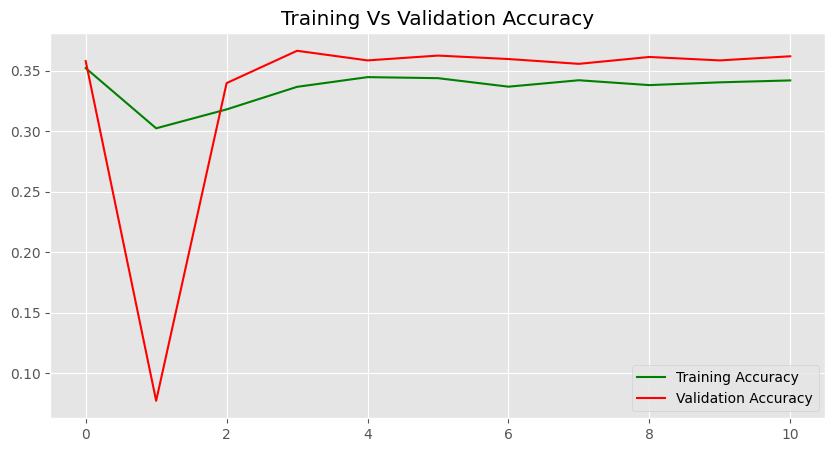

In [16]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize = (10,5), dpi = 100)
plt.plot(train_acc, color = 'green', label = 'Training Accuracy')
plt.plot(val_acc, color = 'red', label = 'Validation Accuracy')
plt.title('Training Vs Validation Accuracy')
plt.legend()

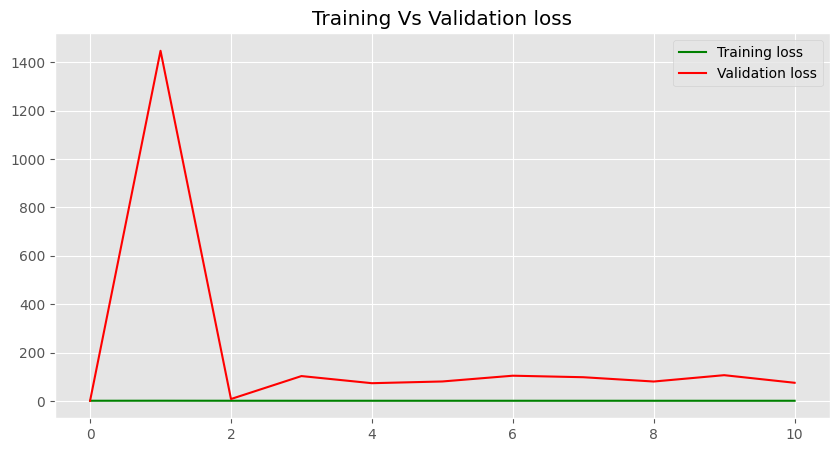

In [17]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize = (10,5), dpi = 100)
plt.plot(train_loss, color = 'green', label = 'Training loss')
plt.plot(val_loss, color = 'red', label = 'Validation loss')
plt.title('Training Vs Validation loss')
plt.legend()

## Model 3

In [14]:
with tf.device('/cpu:0'):
    Inception_model=tf.keras.applications.InceptionV3(
        include_top=False,
        input_shape = (100,100,3),
        weights="imagenet",
        classes=51,
        classifier_activation="softmax"
    )
Inception_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_188 (Conv2D)            (None, 49, 49, 32)   864         ['input_3[0][0]']                
                                                                                                  
 batch_normalization_188 (Batch  (None, 49, 49, 32)  96          ['conv2d_188[0][0]']             
 Normalization)                                                                                   
                                                                                       

 batch_normalization_198 (Batch  (None, 10, 10, 96)  288         ['conv2d_198[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_199 (Batch  (None, 10, 10, 32)  96          ['conv2d_199[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_193 (Activation)    (None, 10, 10, 64)   0           ['batch_normalization_193[0][0]']
                                                                                                  
 activation_195 (Activation)    (None, 10, 10, 64)   0           ['batch_normalization_195[0][0]']
                                                                                                  
 activatio

 conv2d_208 (Conv2D)            (None, 10, 10, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_211 (Conv2D)            (None, 10, 10, 96)   55296       ['activation_210[0][0]']         
                                                                                                  
 batch_normalization_208 (Batch  (None, 10, 10, 48)  144         ['conv2d_208[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_211 (Batch  (None, 10, 10, 96)  288         ['conv2d_211[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

                                                                  'max_pooling2d_10[0][0]']       
                                                                                                  
 conv2d_222 (Conv2D)            (None, 4, 4, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_222 (Batch  (None, 4, 4, 128)   384         ['conv2d_222[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_222 (Activation)    (None, 4, 4, 128)    0           ['batch_normalization_222[0][0]']
                                                                                                  
 conv2d_223 (Conv2D)            (None, 4, 4, 128)    114688      ['activation_222[0][0]']         
          

 Normalization)                                                                                   
                                                                                                  
 activation_232 (Activation)    (None, 4, 4, 160)    0           ['batch_normalization_232[0][0]']
                                                                                                  
 conv2d_233 (Conv2D)            (None, 4, 4, 160)    179200      ['activation_232[0][0]']         
                                                                                                  
 batch_normalization_233 (Batch  (None, 4, 4, 160)   480         ['conv2d_233[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_233 (Activation)    (None, 4, 4, 160)    0           ['batch_normalization_233[0][0]']
          

                                                                                                  
 batch_normalization_243 (Batch  (None, 4, 4, 160)   480         ['conv2d_243[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_243 (Activation)    (None, 4, 4, 160)    0           ['batch_normalization_243[0][0]']
                                                                                                  
 conv2d_239 (Conv2D)            (None, 4, 4, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_244 (Conv2D)            (None, 4, 4, 160)    179200      ['activation_243[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_249 (Conv2D)            (None, 4, 4, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_254 (Conv2D)            (None, 4, 4, 192)    258048      ['activation_253[0][0]']         
                                                                                                  
 batch_normalization_249 (Batch  (None, 4, 4, 192)   576         ['conv2d_249[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_254 (Batch  (None, 4, 4, 192)   576         ['conv2d_254[0][0]']             
 Normalization)                                                                                   
          

 batch_normalization_258 (Batch  (None, 4, 4, 192)   576         ['conv2d_258[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_262 (Batch  (None, 4, 4, 192)   576         ['conv2d_262[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_258 (Activation)    (None, 4, 4, 192)    0           ['batch_normalization_258[0][0]']
                                                                                                  
 activation_262 (Activation)    (None, 4, 4, 192)    0           ['batch_normalization_262[0][0]']
                                                                                                  
 conv2d_25

                                                                                                  
 activation_267 (Activation)    (None, 1, 1, 384)    0           ['batch_normalization_267[0][0]']
                                                                                                  
 activation_270 (Activation)    (None, 1, 1, 384)    0           ['batch_normalization_270[0][0]']
                                                                                                  
 activation_271 (Activation)    (None, 1, 1, 384)    0           ['batch_normalization_271[0][0]']
                                                                                                  
 batch_normalization_272 (Batch  (None, 1, 1, 192)   576         ['conv2d_272[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

                                                                                                  
 batch_normalization_281 (Batch  (None, 1, 1, 192)   576         ['conv2d_281[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_273 (Activation)    (None, 1, 1, 320)    0           ['batch_normalization_273[0][0]']
                                                                                                  
 mixed9_1 (Concatenate)         (None, 1, 1, 768)    0           ['activation_275[0][0]',         
                                                                  'activation_276[0][0]']         
                                                                                                  
 concatenate_5 (Concatenate)    (None, 1, 1, 768)    0           ['activation_279[0][0]',         
          

In [15]:
with tf.device('/cpu:0'):
    model = tf.keras.models.Sequential()
    model.add(Inception_model)

    model.add(Flatten())
    #model.add(Dense(1024, activation = 'relu'))
    model.add(Dense(512, activation = 'relu'))
    model.add(Dense(256, activation = 'relu'))
    model.add(Dense(51, activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               1049088   
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 51)                13107     
                                                                 
Total params: 22,996,307
Trainable params: 22,961,875
Non-trainable params: 34,432
_________________________________________________________________


In [18]:
from tensorflow.keras import callbacks
from keras.callbacks import ReduceLROnPlateau

EARLY_STOPPING = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    restore_best_weights=True,
    mode='auto')


# REDUCE_LR = callbacks.ReduceLROnPlateau(
#     monitor='val_loss',
#     factor=0.8,
#     patience=1,
#     min_lr=0.000001,
#     verbose=1)

REDUCE_LR = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.3,
    patience=1,
    verbose=1,
    mode='auto')

CALLBACKS = [REDUCE_LR, EARLY_STOPPING]
#CALLBACKS = [REDUCE_LR]

In [19]:
with tf.device('/cpu:0'):
    model.compile(optimizer = Adam(),
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])

In [20]:
print("Trainning Model ...\n")
history = model.fit_generator(
    train_generator,
    steps_per_epoch=STEP_SIZE_TRAIN,
    epochs=100,
    verbose=1,
    callbacks=CALLBACKS,
    validation_data=val_generator,
    validation_steps=STEP_SIZE_VALID
)

Trainning Model ...

Epoch 1/100
349/349 [==============================] - 141s 351ms/step - loss: 3.5092 - accuracy: 0.1230 - val_loss: 14.9887 - val_accuracy: 0.0409 - lr: 0.0010
Epoch 2/100
349/349 [==============================] - 119s 340ms/step - loss: 3.4992 - accuracy: 0.1223 - val_loss: 3.9115 - val_accuracy: 0.1028 - lr: 0.0010
Epoch 3/100
349/349 [==============================] - 118s 337ms/step - loss: 3.4232 - accuracy: 0.1334 - val_loss: 3.5019 - val_accuracy: 0.1170 - lr: 0.0010
Epoch 4/100
349/349 [==============================] - ETA: 0s - loss: 3.3261 - accuracy: 0.1449
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
349/349 [==============================] - 116s 330ms/step - loss: 3.3261 - accuracy: 0.1449 - val_loss: 6.2045 - val_accuracy: 0.1352 - lr: 0.0010
Epoch 5/100
349/349 [==============================] - ETA: 0s - loss: 3.2495 - accuracy: 0.1445
Epoch 5: ReduceLROnPlateau reducing learning rate to 9.000000427477062e-05.
349/

## Model 4

In [8]:
from tensorflow.keras import layers
INPUT_SHAPE = (100, 100, 3)

weights = 'imagenet'
dense_units = 1024

inputs = layers.Input(INPUT_SHAPE)

with tf.device('/cpu:0'):
    base_model = tf.keras.applications.InceptionResNetV2(
        include_top=False,
        weights=weights,
        input_shape=INPUT_SHAPE
    )
    
    x = base_model.output
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)

    x = layers.Dense(dense_units)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation(activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    
    outputs = layers.Dense(51, activation="softmax")(x)

    model = keras.Model(inputs=base_model.input, outputs=outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 49, 49, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 49, 49, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

 batch_normalization_10 (BatchN  (None, 10, 10, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 10, 10, 64)  192         ['conv2d_11[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_5 (Activation)      (None, 10, 10, 96)   0           ['batch_normalization_5[0][0]']  
                                                                                                  
 activation_7 (Activation)      (None, 10, 10, 64)   0           ['batch_normalization_7[0][0]']  
                                                                                                  
 activatio

 batch_normalization_19 (BatchN  (None, 10, 10, 32)  96          ['conv2d_19[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_22 (BatchN  (None, 10, 10, 48)  144         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_19 (Activation)     (None, 10, 10, 32)   0           ['batch_normalization_19[0][0]'] 
                                                                                                  
 activation_22 (Activation)     (None, 10, 10, 48)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_18

                                                                                                  
 block35_3_mixed (Concatenate)  (None, 10, 10, 128)  0           ['activation_24[0][0]',          
                                                                  'activation_26[0][0]',          
                                                                  'activation_29[0][0]']          
                                                                                                  
 block35_3_conv (Conv2D)        (None, 10, 10, 320)  41280       ['block35_3_mixed[0][0]']        
                                                                                                  
 block35_3 (Lambda)             (None, 10, 10, 320)  0           ['block35_2_ac[0][0]',           
                                                                  'block35_3_conv[0][0]']         
                                                                                                  
 block35_3

                                                                                                  
 activation_40 (Activation)     (None, 10, 10, 48)   0           ['batch_normalization_40[0][0]'] 
                                                                                                  
 conv2d_36 (Conv2D)             (None, 10, 10, 32)   10240       ['block35_4_ac[0][0]']           
                                                                                                  
 conv2d_38 (Conv2D)             (None, 10, 10, 32)   9216        ['activation_37[0][0]']          
                                                                                                  
 conv2d_41 (Conv2D)             (None, 10, 10, 64)   27648       ['activation_40[0][0]']          
                                                                                                  
 batch_normalization_36 (BatchN  (None, 10, 10, 32)  96          ['conv2d_36[0][0]']              
 ormalizat

 block35_6 (Lambda)             (None, 10, 10, 320)  0           ['block35_5_ac[0][0]',           
                                                                  'block35_6_conv[0][0]']         
                                                                                                  
 block35_6_ac (Activation)      (None, 10, 10, 320)  0           ['block35_6[0][0]']              
                                                                                                  
 conv2d_51 (Conv2D)             (None, 10, 10, 32)   10240       ['block35_6_ac[0][0]']           
                                                                                                  
 batch_normalization_51 (BatchN  (None, 10, 10, 32)  96          ['conv2d_51[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

 conv2d_59 (Conv2D)             (None, 10, 10, 64)   27648       ['activation_58[0][0]']          
                                                                                                  
 batch_normalization_54 (BatchN  (None, 10, 10, 32)  96          ['conv2d_54[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_56 (BatchN  (None, 10, 10, 32)  96          ['conv2d_56[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_59 (BatchN  (None, 10, 10, 64)  192         ['conv2d_59[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_69 (BatchN  (None, 10, 10, 32)  96          ['conv2d_69[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_69 (Activation)     (None, 10, 10, 32)   0           ['batch_normalization_69[0][0]'] 
                                                                                                  
 conv2d_67 (Conv2D)             (None, 10, 10, 32)   10240       ['block35_9_ac[0][0]']           
                                                                                                  
 conv2d_70 (Conv2D)             (None, 10, 10, 48)   13824       ['activation_69[0][0]']          
                                                                                                  
 batch_normalization_67 (BatchN  (None, 10, 10, 32)  96          ['conv2d_67[0][0]']              
 ormalizat

                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_77 (Conv2D)             (None, 4, 4, 128)    139264      ['mixed_6a[0][0]']               
                                                                                                  
 batch_normalization_77 (BatchN  (None, 4, 4, 128)   384         ['conv2d_77[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_77 (Activation)     (None, 4, 4, 128)    0           ['batch_normalization_77[0][0]'] 
                                                                                                  
 conv2d_78 (Conv2D)             (None, 4, 4, 160)    143360      ['activation_77[0][0]']          
          

 activation_85 (Activation)     (None, 4, 4, 128)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 conv2d_86 (Conv2D)             (None, 4, 4, 160)    143360      ['activation_85[0][0]']          
                                                                                                  
 batch_normalization_86 (BatchN  (None, 4, 4, 160)   480         ['conv2d_86[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_86 (Activation)     (None, 4, 4, 160)    0           ['batch_normalization_86[0][0]'] 
                                                                                                  
 conv2d_84 (Conv2D)             (None, 4, 4, 192)    208896      ['block17_2_ac[0][0]']           
          

 activation_94 (Activation)     (None, 4, 4, 160)    0           ['batch_normalization_94[0][0]'] 
                                                                                                  
 conv2d_92 (Conv2D)             (None, 4, 4, 192)    208896      ['block17_4_ac[0][0]']           
                                                                                                  
 conv2d_95 (Conv2D)             (None, 4, 4, 192)    215040      ['activation_94[0][0]']          
                                                                                                  
 batch_normalization_92 (BatchN  (None, 4, 4, 192)   576         ['conv2d_92[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_95 (BatchN  (None, 4, 4, 192)   576         ['conv2d_95[0][0]']              
 ormalizat

 Normalization)                                                                                   
                                                                                                  
 batch_normalization_103 (Batch  (None, 4, 4, 192)   576         ['conv2d_103[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_100 (Activation)    (None, 4, 4, 192)    0           ['batch_normalization_100[0][0]']
                                                                                                  
 activation_103 (Activation)    (None, 4, 4, 192)    0           ['batch_normalization_103[0][0]']
                                                                                                  
 block17_7_mixed (Concatenate)  (None, 4, 4, 384)    0           ['activation_100[0][0]',         
          

 activation_111 (Activation)    (None, 4, 4, 192)    0           ['batch_normalization_111[0][0]']
                                                                                                  
 block17_9_mixed (Concatenate)  (None, 4, 4, 384)    0           ['activation_108[0][0]',         
                                                                  'activation_111[0][0]']         
                                                                                                  
 block17_9_conv (Conv2D)        (None, 4, 4, 1088)   418880      ['block17_9_mixed[0][0]']        
                                                                                                  
 block17_9 (Lambda)             (None, 4, 4, 1088)   0           ['block17_8_ac[0][0]',           
                                                                  'block17_9_conv[0][0]']         
                                                                                                  
 block17_9

 block17_11 (Lambda)            (None, 4, 4, 1088)   0           ['block17_10_ac[0][0]',          
                                                                  'block17_11_conv[0][0]']        
                                                                                                  
 block17_11_ac (Activation)     (None, 4, 4, 1088)   0           ['block17_11[0][0]']             
                                                                                                  
 conv2d_121 (Conv2D)            (None, 4, 4, 128)    139264      ['block17_11_ac[0][0]']          
                                                                                                  
 batch_normalization_121 (Batch  (None, 4, 4, 128)   384         ['conv2d_121[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 batch_normalization_129 (Batch  (None, 4, 4, 128)   384         ['conv2d_129[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_129 (Activation)    (None, 4, 4, 128)    0           ['batch_normalization_129[0][0]']
                                                                                                  
 conv2d_130 (Conv2D)            (None, 4, 4, 160)    143360      ['activation_129[0][0]']         
                                                                                                  
 batch_normalization_130 (Batch  (None, 4, 4, 160)   480         ['conv2d_130[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 batch_normalization_138 (Batch  (None, 4, 4, 160)   480         ['conv2d_138[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_138 (Activation)    (None, 4, 4, 160)    0           ['batch_normalization_138[0][0]']
                                                                                                  
 conv2d_136 (Conv2D)            (None, 4, 4, 192)    208896      ['block17_15_ac[0][0]']          
                                                                                                  
 conv2d_139 (Conv2D)            (None, 4, 4, 192)    215040      ['activation_138[0][0]']         
                                                                                                  
 batch_normalization_136 (Batch  (None, 4, 4, 192)   576         ['conv2d_136[0][0]']             
 Normaliza

 conv2d_147 (Conv2D)            (None, 4, 4, 192)    215040      ['activation_146[0][0]']         
                                                                                                  
 batch_normalization_144 (Batch  (None, 4, 4, 192)   576         ['conv2d_144[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_147 (Batch  (None, 4, 4, 192)   576         ['conv2d_147[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_144 (Activation)    (None, 4, 4, 192)    0           ['batch_normalization_144[0][0]']
                                                                                                  
 activatio

                                                                                                  
 activation_152 (Activation)    (None, 4, 4, 192)    0           ['batch_normalization_152[0][0]']
                                                                                                  
 activation_155 (Activation)    (None, 4, 4, 192)    0           ['batch_normalization_155[0][0]']
                                                                                                  
 block17_20_mixed (Concatenate)  (None, 4, 4, 384)   0           ['activation_152[0][0]',         
                                                                  'activation_155[0][0]']         
                                                                                                  
 block17_20_conv (Conv2D)       (None, 4, 4, 1088)   418880      ['block17_20_mixed[0][0]']       
                                                                                                  
 block17_2

 activation_165 (Activation)    (None, 1, 1, 224)    0           ['batch_normalization_165[0][0]']
                                                                                                  
 conv2d_163 (Conv2D)            (None, 1, 1, 192)    399360      ['mixed_7a[0][0]']               
                                                                                                  
 conv2d_166 (Conv2D)            (None, 1, 1, 256)    172032      ['activation_165[0][0]']         
                                                                                                  
 batch_normalization_163 (Batch  (None, 1, 1, 192)   576         ['conv2d_163[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_166 (Batch  (None, 1, 1, 256)   768         ['conv2d_166[0][0]']             
 Normaliza

 Normalization)                                                                                   
                                                                                                  
 batch_normalization_174 (Batch  (None, 1, 1, 256)   768         ['conv2d_174[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_171 (Activation)    (None, 1, 1, 192)    0           ['batch_normalization_171[0][0]']
                                                                                                  
 activation_174 (Activation)    (None, 1, 1, 256)    0           ['batch_normalization_174[0][0]']
                                                                                                  
 block8_3_mixed (Concatenate)   (None, 1, 1, 448)    0           ['activation_171[0][0]',         
          

 activation_182 (Activation)    (None, 1, 1, 256)    0           ['batch_normalization_182[0][0]']
                                                                                                  
 block8_5_mixed (Concatenate)   (None, 1, 1, 448)    0           ['activation_179[0][0]',         
                                                                  'activation_182[0][0]']         
                                                                                                  
 block8_5_conv (Conv2D)         (None, 1, 1, 2080)   933920      ['block8_5_mixed[0][0]']         
                                                                                                  
 block8_5 (Lambda)              (None, 1, 1, 2080)   0           ['block8_4_ac[0][0]',            
                                                                  'block8_5_conv[0][0]']          
                                                                                                  
 block8_5_

 block8_7 (Lambda)              (None, 1, 1, 2080)   0           ['block8_6_ac[0][0]',            
                                                                  'block8_7_conv[0][0]']          
                                                                                                  
 block8_7_ac (Activation)       (None, 1, 1, 2080)   0           ['block8_7[0][0]']               
                                                                                                  
 conv2d_192 (Conv2D)            (None, 1, 1, 192)    399360      ['block8_7_ac[0][0]']            
                                                                                                  
 batch_normalization_192 (Batch  (None, 1, 1, 192)   576         ['conv2d_192[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 batch_normalization_200 (Batch  (None, 1, 1, 192)   576         ['conv2d_200[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_200 (Activation)    (None, 1, 1, 192)    0           ['batch_normalization_200[0][0]']
                                                                                                  
 conv2d_201 (Conv2D)            (None, 1, 1, 224)    129024      ['activation_200[0][0]']         
                                                                                                  
 batch_normalization_201 (Batch  (None, 1, 1, 224)   672         ['conv2d_201[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

In [9]:
with tf.device('/cpu:0'):
    model.compile(optimizer = Adam(),
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])

In [10]:
print("Trainning Model ...\n")
history = model.fit_generator(
    train_generator,
    steps_per_epoch=STEP_SIZE_TRAIN,
    epochs=150,
    verbose=1,
    validation_data=val_generator,
    validation_steps=STEP_SIZE_VALID
)

Trainning Model ...

Epoch 1/150
349/349 [==============================] - 137s 337ms/step - loss: 3.6855 - accuracy: 0.1508 - val_loss: 47.1808 - val_accuracy: 0.1943
Epoch 2/150
349/349 [==============================] - 113s 323ms/step - loss: 3.0478 - accuracy: 0.2329 - val_loss: 14.0689 - val_accuracy: 0.2074
Epoch 3/150
349/349 [==============================] - 113s 324ms/step - loss: 2.9449 - accuracy: 0.2556 - val_loss: 550.2209 - val_accuracy: 0.0909
Epoch 4/150
349/349 [==============================] - 112s 321ms/step - loss: 2.9110 - accuracy: 0.2396 - val_loss: 326.8526 - val_accuracy: 0.1670
Epoch 5/150
349/349 [==============================] - 112s 322ms/step - loss: 2.7025 - accuracy: 0.2703 - val_loss: 2.6775 - val_accuracy: 0.3290
Epoch 6/150
349/349 [==============================] - 113s 322ms/step - loss: 2.7783 - accuracy: 0.2580 - val_loss: 4.4165 - val_accuracy: 0.1273
Epoch 7/150
349/349 [==============================] - 112s 320ms/step - loss: 2.8586 - acc

349/349 [==============================] - 113s 323ms/step - loss: 2.4569 - accuracy: 0.3133 - val_loss: 6.3211 - val_accuracy: 0.3443
Epoch 57/150
349/349 [==============================] - 112s 322ms/step - loss: 2.3416 - accuracy: 0.3391 - val_loss: 72.6696 - val_accuracy: 0.3403
Epoch 58/150
349/349 [==============================] - 112s 322ms/step - loss: 2.6579 - accuracy: 0.2712 - val_loss: 5.8979 - val_accuracy: 0.1568
Epoch 59/150
349/349 [==============================] - 113s 323ms/step - loss: 2.6281 - accuracy: 0.2818 - val_loss: 5.3801 - val_accuracy: 0.3028
Epoch 60/150
349/349 [==============================] - 113s 325ms/step - loss: 2.4735 - accuracy: 0.3110 - val_loss: 7.6091 - val_accuracy: 0.3375
Epoch 61/150
349/349 [==============================] - 112s 321ms/step - loss: 2.4639 - accuracy: 0.3107 - val_loss: 2.7864 - val_accuracy: 0.3369
Epoch 62/150
349/349 [==============================] - 113s 323ms/step - loss: 2.5195 - accuracy: 0.3066 - val_loss: 2.7222

349/349 [==============================] - 111s 319ms/step - loss: 1.8561 - accuracy: 0.4503 - val_loss: 3080.3088 - val_accuracy: 0.3534
Epoch 112/150
349/349 [==============================] - 112s 320ms/step - loss: 1.8550 - accuracy: 0.4624 - val_loss: 71.9161 - val_accuracy: 0.3733
Epoch 113/150
349/349 [==============================] - 111s 319ms/step - loss: 1.8200 - accuracy: 0.4640 - val_loss: 98.5401 - val_accuracy: 0.3949
Epoch 114/150
349/349 [==============================] - 112s 321ms/step - loss: 1.9477 - accuracy: 0.4326 - val_loss: 11.5098 - val_accuracy: 0.4023
Epoch 115/150
349/349 [==============================] - 112s 322ms/step - loss: 1.8657 - accuracy: 0.4533 - val_loss: 69.7471 - val_accuracy: 0.4313
Epoch 116/150
349/349 [==============================] - 111s 319ms/step - loss: 1.9197 - accuracy: 0.4429 - val_loss: 132.2374 - val_accuracy: 0.4233
Epoch 117/150
349/349 [==============================] - 111s 319ms/step - loss: 1.8580 - accuracy: 0.4588 - va

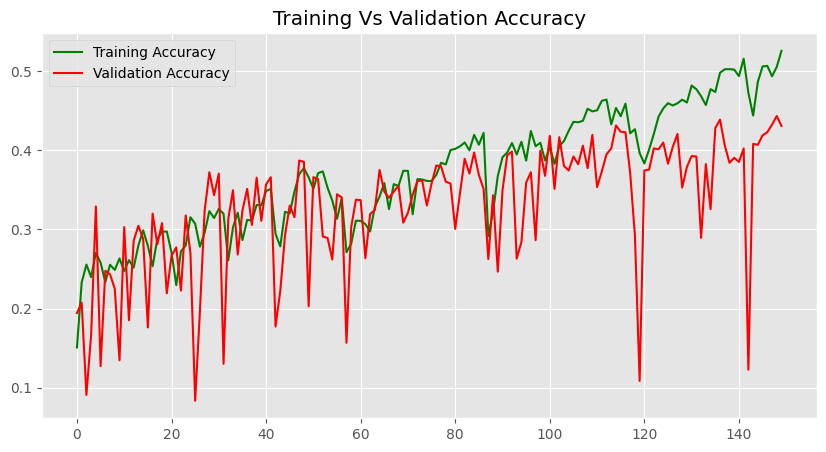

In [11]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize = (10,5), dpi = 100)
plt.plot(train_acc, color = 'green', label = 'Training Accuracy')
plt.plot(val_acc, color = 'red', label = 'Validation Accuracy')
plt.title('Training Vs Validation Accuracy')
plt.legend()

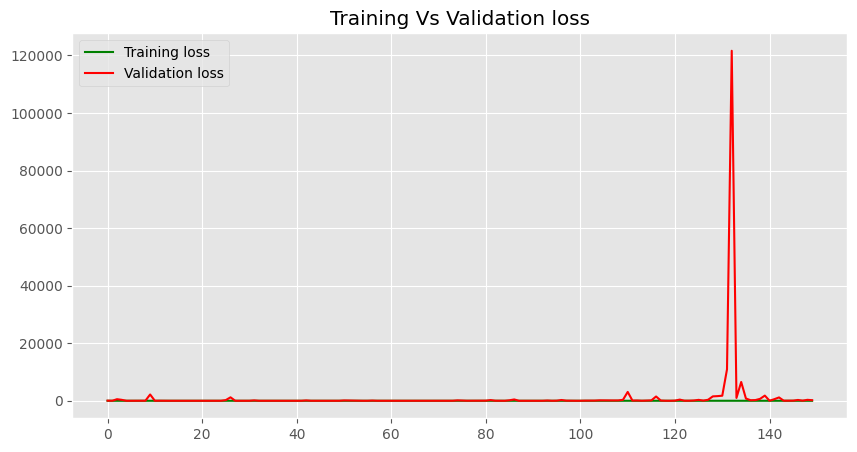

In [12]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize = (10,5), dpi = 100)
plt.plot(train_loss, color = 'green', label = 'Training loss')
plt.plot(val_loss, color = 'red', label = 'Validation loss')
plt.title('Training Vs Validation loss')
plt.legend()